In [45]:
import json
import os
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import tarfile
import pickle
import numpy as np
from tqdm import tqdm

path = "tsinghuaDaimlerDataset"

In [33]:
#extract images or labels
# open file
file = tarfile.open('leftImg8bit_train.tar.gz')
# extracting file
file.extractall('tsinghuaDaimlerDataset/images_train')
file.close()

In [148]:
# create bbox from label
def create_bbox(path) : 
    for _, _, fnames in sorted(os.walk(path+"/label")): #for each folder
        for fname in fnames :
            with open(path+"/label/"+fname) as json_file:
                im = json.load(json_file)
            bbox = {"y": im["children"][0]["minrow"], "x": im["children"][0]["mincol"], "w": (im["children"][0]["maxcol"]), "h": im["children"][0]["maxrow"]}
            with open(path +"/bbox2/"+ os.path.splitext(im["imagename"])[0]+".json", "w") as outfile:
                json.dump(bbox, outfile)
create_bbox(path)

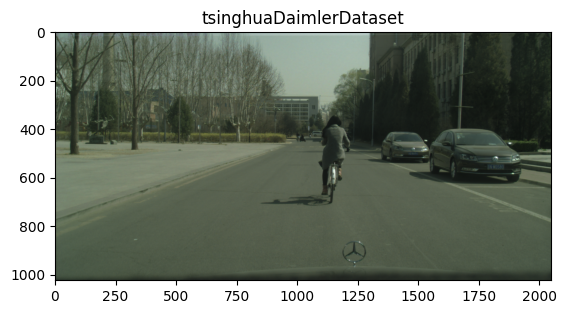

In [3]:
plt.title("tsinghuaDaimlerDataset")
fig, (ax1, ax2) = plt.subplots(1, 2)

image = mpimg.imread("tsinghuaDaimlerDataset/images_train/tsinghuaDaimlerDataset_2015-03-24_041424_000021631_leftImg8bit.png")

with open(path+"/bbox2/"+"tsinghuaDaimlerDataset_2015-03-24_041424_000021631_leftImg8bit.json" ) as json_file:
    bbox = json.load(json_file)
print(bbox)

roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 
noise = np.random.randint(0, 2, roi.shape, dtype=np.uint8)
image_noise = image
image_noise[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] = noise

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image)
ax2.imshow(image_noise)
plt.show()


In [51]:
def replace_plastics_with_noise(path_images, path_bounding_boxes):
    # Iterate over the bounding boxes
    for _, _, fnames in sorted(os.walk(path_images)): 
        for fname in tqdm(fnames[760:]) :
        
            image = mpimg.imread(path_images + fname)

            with open(path_bounding_boxes + os.path.splitext(fname)[0] + ".json" ) as json_file:
                bbox = json.load(json_file)
            
            roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 

            # Generate random noise
            noise = np.random.randint(0, 2, roi.shape, dtype=np.uint8)

            # Replace the ROI with random noise
            image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] = noise

            im_path = path + "/images_train_noise/ "+ fname
            with open(im_path, "wb") as f:
                # Dump the image data into the file using pickle
                pickle.dump(image, f)

In [52]:
replace_plastics_with_noise( path + "/images_train/", path + "/bbox2/")

  0%|          | 7/8981 [00:01<32:31,  4.60it/s]


OSError: [Errno 5] Input/output error